### In this project we will try to build a model that predict the price of a car given data table

### Main Goal is to :

1. Predict the price of the car
2. See the main features that can predict the price with high accuracy

In [672]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [673]:
pwd

'D:\\Interface management_back up\\105-Python\\00-Machine Learning\\98-Training\\archive'

In [765]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [675]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [676]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [766]:
df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [677]:
df.corr()['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

In [678]:
len(df)

205

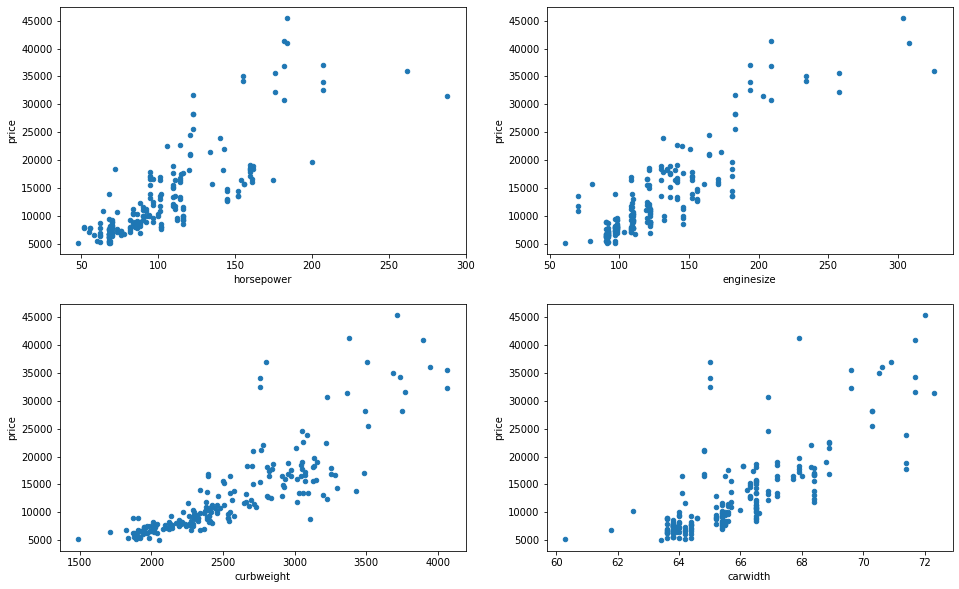

In [679]:
fig,axes=plt.subplots(nrows=2, ncols=2,figsize=(16,10))


df.plot.scatter(x='horsepower', y='price', ax=axes[0,0])
df.plot.scatter(x='enginesize', y='price', ax=axes[0,1])
df.plot.scatter(x='curbweight', y='price', ax=axes[1,0])
df.plot.scatter(x='carwidth', y='price', ax=axes[1,1])

## Feature Engineering

1. CarName should be feature engineered

In [680]:
df['CarName']=df['CarName'].apply(lambda x : x.split()[0])

In [681]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [682]:
symboling=pd.get_dummies(df['symboling'], drop_first=True).astype('float')
fueltype=pd.get_dummies(df['fueltype'], drop_first=True).astype('float')
aspiration=pd.get_dummies(df['aspiration'], drop_first=True).astype('float')
doornumber=pd.get_dummies(df['doornumber'], drop_first=True).astype('float')

carbody=pd.get_dummies(df['carbody'], drop_first=True).astype('float')
drivewheel=pd.get_dummies(df['drivewheel'], drop_first=True).astype('float')
enginelocation=pd.get_dummies(df['enginelocation'], drop_first=True).astype('float')
enginetype=pd.get_dummies(df['enginetype'], drop_first=True).astype('float')
cylindernumber=pd.get_dummies(df['cylindernumber'], drop_first=True).astype('float')
fuelsystem=pd.get_dummies(df['fuelsystem'], drop_first=True).astype('float')
CarName=pd.get_dummies(df['CarName'], drop_first=True).astype('float')


In [683]:
df.drop(['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','CarName'], axis=1, inplace=True)

In [684]:
df=pd.concat([df,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarName], axis=1)

In [685]:
len(df)

205

In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
 15  -1                205 non-null    float64
 16  0                 205 non-null    float64
 1

In [687]:
df.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [688]:
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

### Save processed data 

In [689]:
df_tmp=df.copy()

In [690]:
df_tmp.to_csv('cars_price.csv')

In [691]:
X=df_tmp.drop(['price'], axis=1)

In [692]:
y=df_tmp['price']

In [693]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)




In [694]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [695]:
X_train=scaler.fit_transform(X_train)

C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [696]:
X_test=scaler.transform(X_test)

C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [700]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [701]:
def evaluate(y_true,y_preds):
    r2=r2_score(y_true,y_preds)
    MAE=mean_absolute_error(y_true,y_preds)
    MSE=mean_squared_error(y_true,y_preds)
    
    metrics_dict={'r2': round(r2,2),
                 'MAE': round(MAE,2),
                 'MSE': round(MSE,2)}
    #print(f"r2:{r2*100:.2f}%")
    #print(f"MAE:{MAE}")
    #print(f"MSE:{MSE}")
    return metrics_dict

### Bassic regression model using:
    - RandomForestRegressor
    - Logistic Regression
    - Ridge Regression
    
    


In [702]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

RFR=RandomForestRegressor()
Lass=Lasso()
Rg=Ridge()

In [703]:
models={'RandomForest':RFR,
       'LAsso Regression':Lass,
       'Ridge Resgression': Rg}

In [705]:
def train_and_fit(X_train,y_train, X_test,y_test):
    
    """"
    train, fit and evaluate the model
    
    """
    #Fit the model
    
    for text, model in models.items():
        model.fit(X_train,y_train)
        y_preds=model.predict(X_test)
        #return evaluate(y_test,y_preds)
        print(f"for the {text}, the metrics are: {evaluate(y_test,y_preds)}")   
        print("\n")


In [706]:
train_and_fit(X_train,y_train,X_test,y_test)

for the RandomForest, the metrics are: {'r2': 0.94, 'MAE': 1356.8, 'MSE': 3903387.27}


for the LAsso Regression, the metrics are: {'r2': 0.89, 'MAE': 1846.14, 'MSE': 7327257.01}


for the Ridge Resgression, the metrics are: {'r2': 0.85, 'MAE': 2198.42, 'MSE': 10116439.76}




In [707]:
import seaborn as sns

In [708]:
dict_metrics.keys()

dict_keys(['r2', 'MAE', 'MSE'])

In [709]:
dict_metrics={'r2':[0.94,0.89,0.85],
            'MAE': [1426.34,1846.14,2198.42], 
            'MSE': [4057037.91,7327257.01,10116439.76]}

In [710]:
pd_metrics=pd.DataFrame(dict_metrics, index=models.keys())
#pd_metrics.columns=list(models.keys())

In [711]:
pd_metrics.reset_index(inplace=True)

In [712]:
pd_metrics.columns=['Model','r2', 'MAE', 'MSE']

In [713]:
list(pd_metrics.columns)[1:]

['r2', 'MAE', 'MSE']

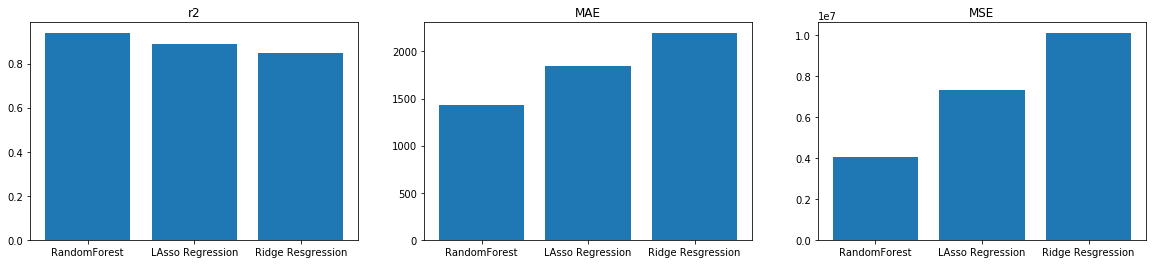

In [714]:
fig,ax=plt.subplots(1,3,figsize=(20,4))

for i in range(3):
   
    ax[i].bar(pd_metrics['Model'],pd_metrics[list(pd_metrics.columns)[1:][i]])
    ax[i].set_title(list(pd_metrics.columns)[1:][i])

In [720]:
preds=RFR.predict(X_test[5:9])

In [721]:
preds

array([6706.94, 8005.12, 8081.72, 9969.93])

In [723]:
y_test[5:9].values

array([ 7799.,  7788.,  9258., 10198.])

In [727]:
RFR.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

The conclusion is that the `RandomForestRgressor` is the best model 
- Lets try to squeeze in this model and find the best hyperparameters

### Using GridSearchCV

In [728]:
from sklearn.model_selection import GridSearchCV
rf_grid={
    'bootstrap': [True],
    'max_depth': [None,80, 90],
    'max_features': ['auto', 2, 3],
    'min_samples_leaf': [None,3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
    }
model=RandomForestRegressor()
gs_model=GridSearchCV(model, rf_grid, cv=5, verbose=2, n_jobs=-1)
gs_model.fit(X_train,y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "C:\Users\saf167687\Anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\saf16

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None, 80, 90],
                         'max_features': ['auto', 2, 3],
                         'min_samples_leaf': [None, 3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [729]:
gs_model.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [730]:
gs_preds=gs_model.predict(X_test)

In [731]:
rf_preds=RFR.predict(X_test)

In [732]:
evaluate(y_test,gs_preds)

{'r2': 0.93, 'MAE': 1560.25, 'MSE': 4974418.74}

In [733]:
evaluate(y_test,rf_preds)

{'r2': 0.94, 'MAE': 1356.8, 'MSE': 3903387.27}

## Save the model

In [735]:
import pickle

pickle.dump(RFR, open("car_model_price_detector.pkl",'wb'))

In [736]:
##Load a saved model
loaded_model=pickle.load(open("car_model_price_detector.pkl",'rb'))

In [737]:
loaded_preds=loaded_model.predict(X_test)
evaluate(y_test,loaded_preds)

{'r2': 0.94, 'MAE': 1356.8, 'MSE': 3903387.27}

In [752]:
df_tmp[8:10]

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
8,9,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,99.5,178.2,67.9,52.0,3053,131,3.13,3.4,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [753]:
df_tmp[8:10]['price']

8    23875.000
9    17859.167
Name: price, dtype: float64

In [746]:
X=df_tmp[8:10].drop('price', axis=1)

In [747]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [748]:
X=scaler.fit_transform(X)

C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\saf167687\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [749]:
RFR.predict(X)

array([17915.9  ,  8047.435])

In [750]:
loaded_model.predict(X)

array([17915.9  ,  8047.435])

In [751]:
np.array(df_tmp['price'][8:10])

array([23875.   , 17859.167])

In [657]:
len(RFR.feature_importances_)

75

In [754]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=15):
    
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

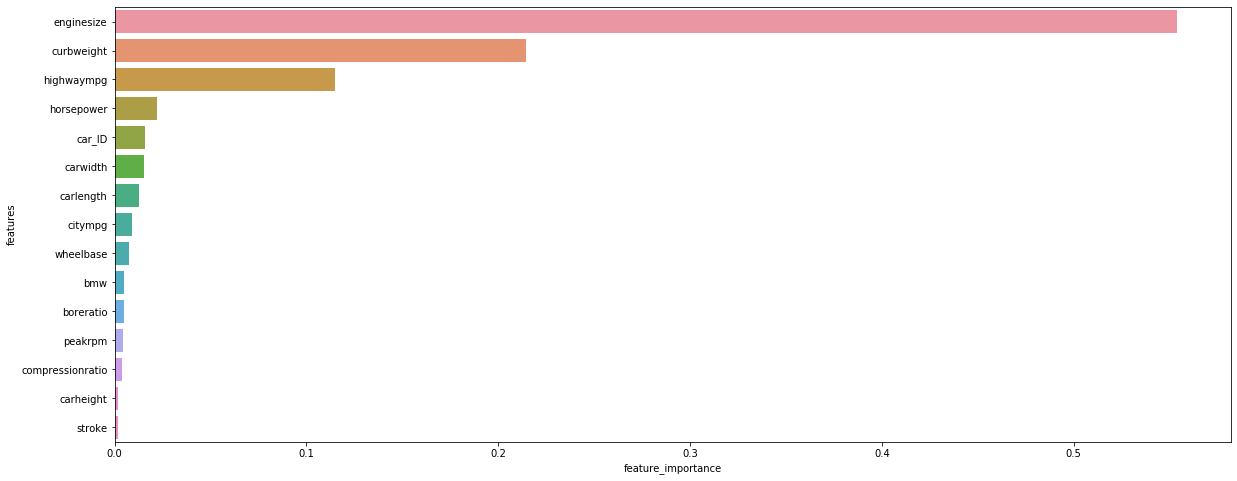

In [755]:
plt.figure(figsize=(20,8))
l=df_tmp.drop(['price'], axis=1)
plot_features(l.columns, RFR.feature_importances_)

   ###  Deep learning

* Machine Learning using Keras and Tensorflow

In [769]:
#pip install tensorflow

import tensorflow as tf

In [770]:
from tensorflow.keras.models import Sequential


ModuleNotFoundError: No module named 'tensorflow.keras'